### Decision Trees

*** 

### Introduction:

### Decision trees are a popular machine learning method used for classification and regression tasks. They model decisions and their possible consequences as a tree-like structure, where each internal node represents a decision based on a feature, each branch represents an outcome of that decision, and each leaf node represents a final classification or regression result. 

### Decision trees are intuitive and easy to interpret, as they mimic human decision-making processes. Key benefits include their simplicity, ability to handle both numerical and categorical data, and minimal preprocessing requirements. 

### However, they can be prone to overfitting, especially with deep trees, and may require techniques such as pruning, ensemble methods (e.g., random forests), or constraints on tree depth to improve generalization.

### In this section, we will build a Decision Tree model using the iris dataset and visualize the Decision Tree.

***

### Importing libraries and data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Visualizing the Sepal Length and Sepal Width

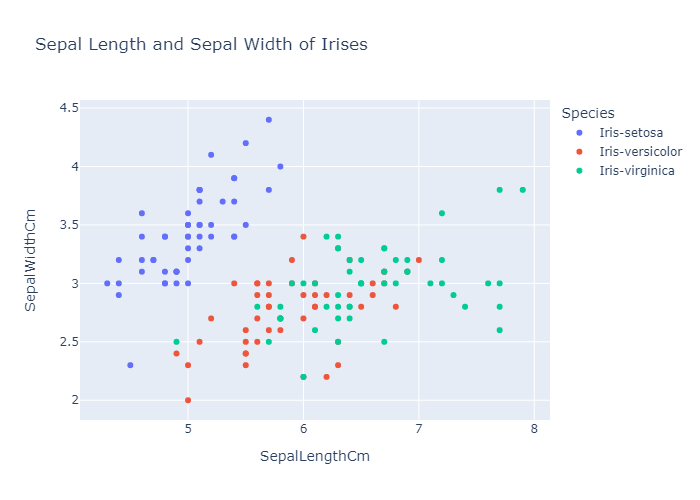

In [3]:
fig = px.scatter(df, x="SepalLengthCm", y="SepalWidthCm", color="Species", title="Sepal Length and Sepal Width of Irises")
fig.show("png")

### Visualizing the Petal Length and Petal Width

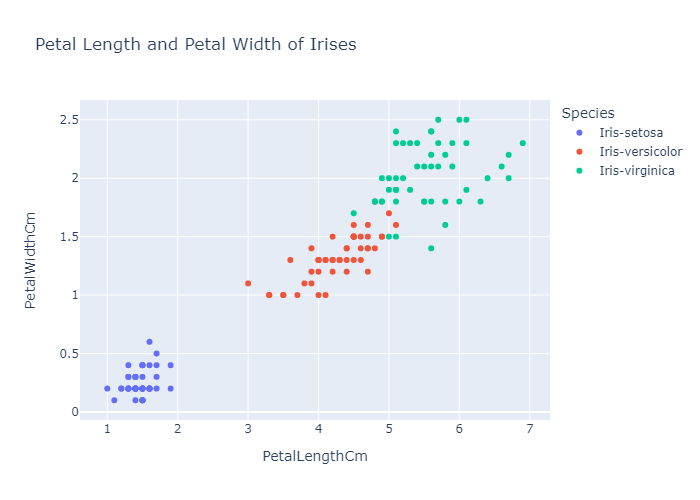

In [4]:
fig = px.scatter(df, x="PetalLengthCm", y="PetalWidthCm", color="Species", title="Petal Length and Petal Width of Irises")
fig.show("png")

### Encoding the species column and building a Decision Tree model

In [5]:
# Features: Sepal length, Sepal width, Petal length, Petal width
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Target variable: Species (currently in string form)
y = df['Species'].values

# Encode the target variable (species) into numeric classes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Set up K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True)

# Perform Cross Validation
cv_scores = cross_val_score(clf, X, y_encoded, cv=kf)

# Print Cross Validation results
print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")

Cross Validation Scores: [0.94 0.82 0.98]
Mean CV Score: 0.91


### Visualizing the Decision Tree

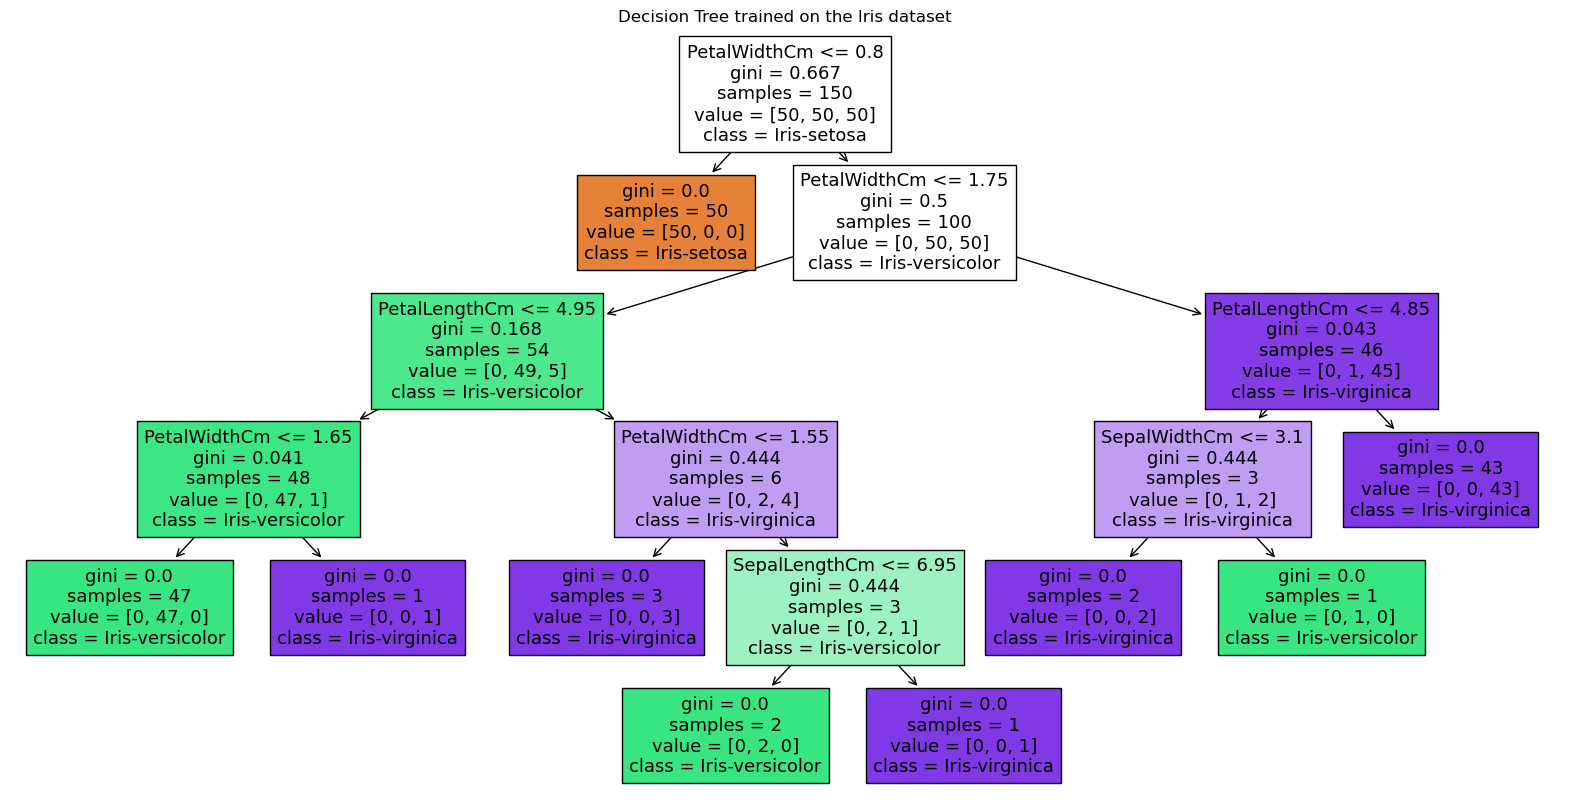

In [6]:
# Train the Decision Tree classifier on the entire dataset
clf.fit(X, y_encoded)

# Convert class names to a list
class_names = label_encoder.classes_.tolist()

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
          class_names=class_names, filled=True)
plt.title("Decision Tree trained on the Iris dataset")
plt.show("png")

### Understanding the Decision Tree:

### The Decision Tree works by 'asking a question'. Then the model categorizes the class according to the answer. If True, the next node follows the left arrow. If False, the next node follows the right arrow. For example: 

### PetalWidthCm <= 0.8? True > follow left arrow > Iris-setosa | False > follow right arrow > Next question

### PetalWidhtCm <= 1.75 cm? True > follow left arrow > Next Question | False > follow right arrow > Next Question

### etc. up until the end

*** 

### Conclusion:

### This notebook implements a Decision Tree classifier to predict Iris species based on sepal and petal measurements. The dataset is preprocessed by encoding the categorical species labels into numeric classes using LabelEncoder. Cross-validation with K-Fold (k=3) is employed to assess model performance, yielding cross-validation scores and a mean accuracy score of 0.91, indicating robust predictive capability. 

### The Decision Tree is then trained on the entire dataset, visualized using plot_tree, and interpreted to reveal how the model makes classification decisions based on feature splits. The resulting plot provides insights into feature importance and decision-making logic, illustrating the effectiveness of the Decision Tree in distinguishing between different Iris species.